In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Loading the data
bodyfat = pd.read_csv('datasets/bodyfat.csv', header=None, names=['density', 'siri_fat', 'age', 'weight', 'height', 'neck', 'chest', 'abdomen2', 'hip', 'thigh', 'knee', 'ankle', 'biceps_extended', 'forearm', 'wrist'], sep=' ')
bodyfat.head()

,density,siri_fat,age,weight,height,neck,chest,abdomen2,hip,thigh,knee,ankle,biceps_extended,forearm,wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
# Checking NaN cells
print(bodyfat.shape)
bodyfat.isna().sum()

(252, 15)


density            0
siri_fat           0
age                0
weight             0
height             0
neck               0
chest              0
abdomen2           0
hip                0
thigh              0
knee               0
ankle              0
biceps_extended    0
forearm            0
wrist              0
dtype: int64

In [8]:
bodyfat.corr()

,density,siri_fat,age,weight,height,neck,chest,abdomen2,hip,thigh,knee,ankle,biceps_extended,forearm,wrist
density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
siri_fat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
abdomen2,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


We can see that the correlations are relatively high in this data set and that's why all columns are going to be used during the predictions.

In [13]:
# Separating the data into X, y
X = bodyfat.drop(['siri_fat'], axis=1)
y = bodyfat['siri_fat']

# 70% training and 30% testing split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.7)

# Scaling the variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
print(X_train.shape, X_test.shape)

(176, 14) (76, 14)


---
# Regression

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Ridge

Best estimator: {'alpha': 0.1}
Accuracy: 0.9722579927979101


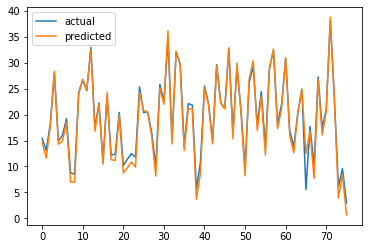

In [29]:
parameters = {'alpha': [10**i for i in range(-3,5)]}

ridge = Ridge()
clf = GridSearchCV(lasso, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Best estimator:', clf.best_params_)
print('Accuracy:', clf.score(X_test, y_test))
plt.plot(y_test, label='actual');
plt.plot(y_pred, label='predicted');
plt.legend();

## Lasso

Best estimator: {'alpha': 0.1}
Accuracy: 0.9722579927979101


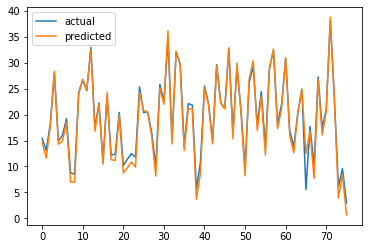

In [30]:
parameters = {'alpha': [10**i for i in range(-3,5)]}

lasso = Lasso()
clf = GridSearchCV(lasso, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Best estimator:', clf.best_params_)
print('Accuracy:', clf.score(X_test, y_test))
plt.plot(y_test, label='actual');
plt.plot(y_pred, label='predicted');
plt.legend();

## SVR

In [31]:
parameters = {'C': [10**i for i in range(-2, 4)], 'kernel': ('linear', 'poly', 'rbf')}

svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Best estimator:', clf.best_params_)
print('Accuracy:', clf.score(X_test, y_test))

Best estimator: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.9604287614044207


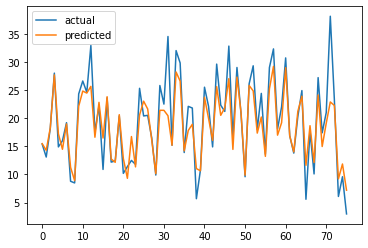

In [21]:
plt.plot(y_test, label='actual');
plt.plot(y_pred, label='predicted');
plt.legend();